In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Analysis of Animation Studio Dataset

In [3]:
df = pd.read_csv("data/animation_studios.csv")

#### Basic Details 

In [4]:
print("Entries in DF:", df.shape[0])
print("DF Columns:", ", ".join(df.columns))
df

Entries in DF: 348
DF Columns: Studio, Country, Founded, Notes and sources


,Studio,Country,Founded,Notes and sources
0,Animoon,Poland,?,[1]
1,Sun Creature Studio,Denmark,2014,NaN
2,Copenhagen Bombay,Denmark,2006,NaN
3,Honeydew Studios,Australia,2009,NaN
4,Dockhus Animation,Sweden,?,[2]
...,...,...,...,...
343,Xyzoo Animation,South Africa,1991,NaN
344,Yowza! Animation,Canada,1996,NaN
345,Zagreb school of animated films,Croatia,1956,NaN
346,Zexcs,Japan,1998,NaN


In [5]:
# Isolating popular studios (i.e. Pixar, Disney, DreamWorks, etc.)
popular_studios = df[df["Studio"].isin(["Pixar", "Disney", "DreamWorks", "Illumination", "Blue Sky", "Sony", "Paramount", "Warner Bros."])]
popular_studios

# This data-set only includes studios that uniquely produced animations.

,Studio,Country,Founded,Notes and sources
134,Illumination,United States,2007,Subsidiary of Comcast
221,Pixar,United States,1986,Subsidiary of The Walt Disney Company; made th...


#### Handling NaNs

In [6]:
# Dropping Notes/Sources Column due to irrelevance

df = df.drop("Notes and sources", axis = 1)

In [7]:
df["Country"].replace("?", np.nan, inplace=True)
df["Founded"].replace("?", np.nan, inplace=True)

print(df["Country"].isna().sum())
print(df["Founded"].isna().sum())

df.dropna(subset=["Founded"], inplace=True)

df

0
8


,Studio,Country,Founded
1,Sun Creature Studio,Denmark,2014
2,Copenhagen Bombay,Denmark,2006
3,Honeydew Studios,Australia,2009
5,Zigzag Animation,Sweden,1985
6,Krátký Film Praha,Czech Republic,1957
...,...,...,...
343,Xyzoo Animation,South Africa,1991
344,Yowza! Animation,Canada,1996
345,Zagreb school of animated films,Croatia,1956
346,Zexcs,Japan,1998


#### Basis Statistics: Countries

In [8]:
unq_countries = df["Country"].unique()
print("Unique Countries:", unq_countries.shape)

Unique Countries: (38,)


/tmp/ipykernel_64667/2768610757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette='pastel')


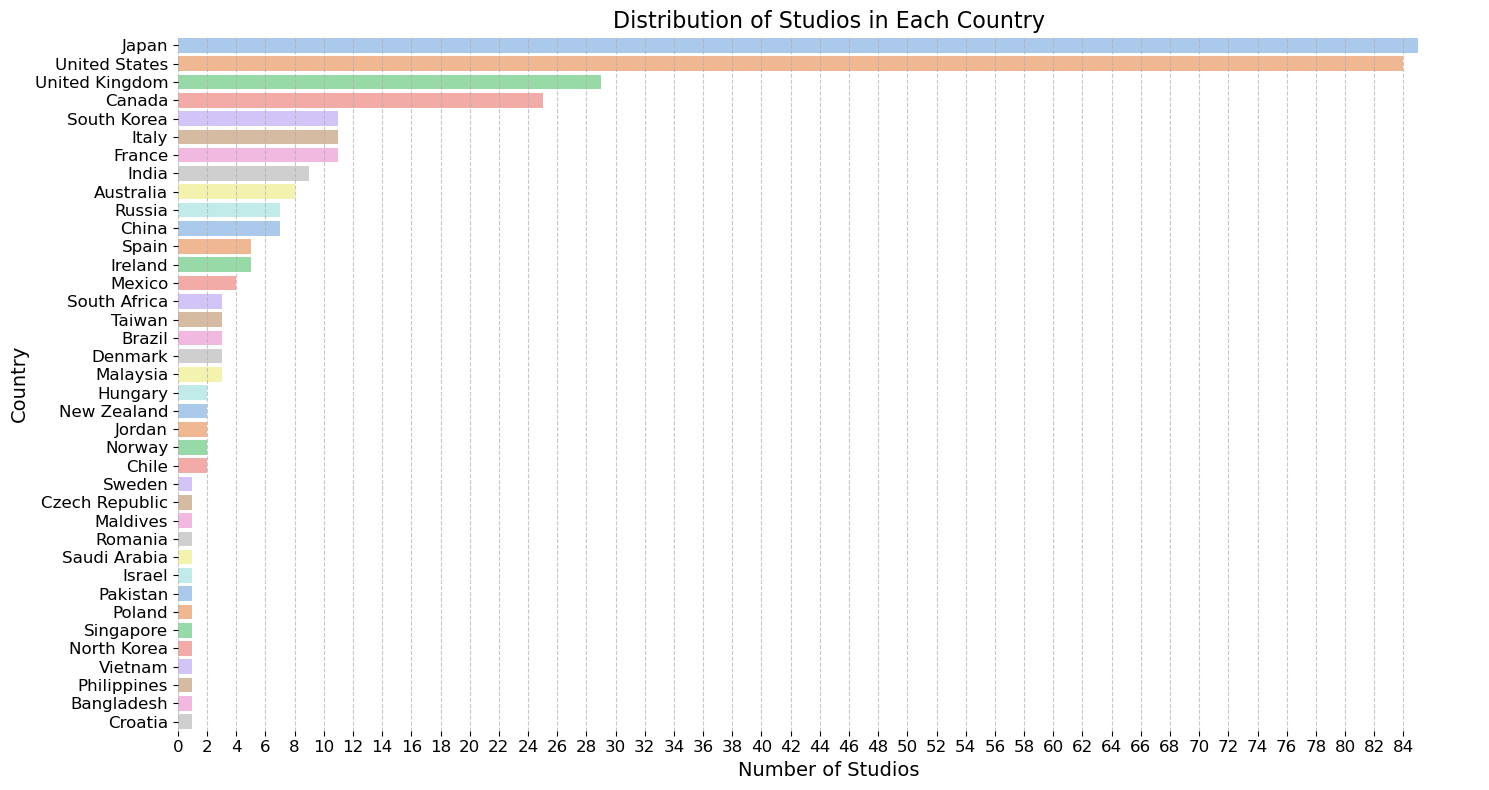

In [9]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette='pastel')
plt.title('Distribution of Studios in Each Country', fontsize=16)
plt.xticks(ticks=np.arange(0, df['Country'].value_counts().max() + 1, 2))
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.set_palette("husl")
plt.xlabel('Number of Studios', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/studio_country_distribution.png')
plt.show()

#### Basis Statistics: Countries

In [11]:
unq_founded = df["Founded"].unique()
print("Earliest Founding:", unq_founded.min())
print("Latest Founding:", unq_founded.max())


Earliest Founding: 1923
Latest Founding: 2021


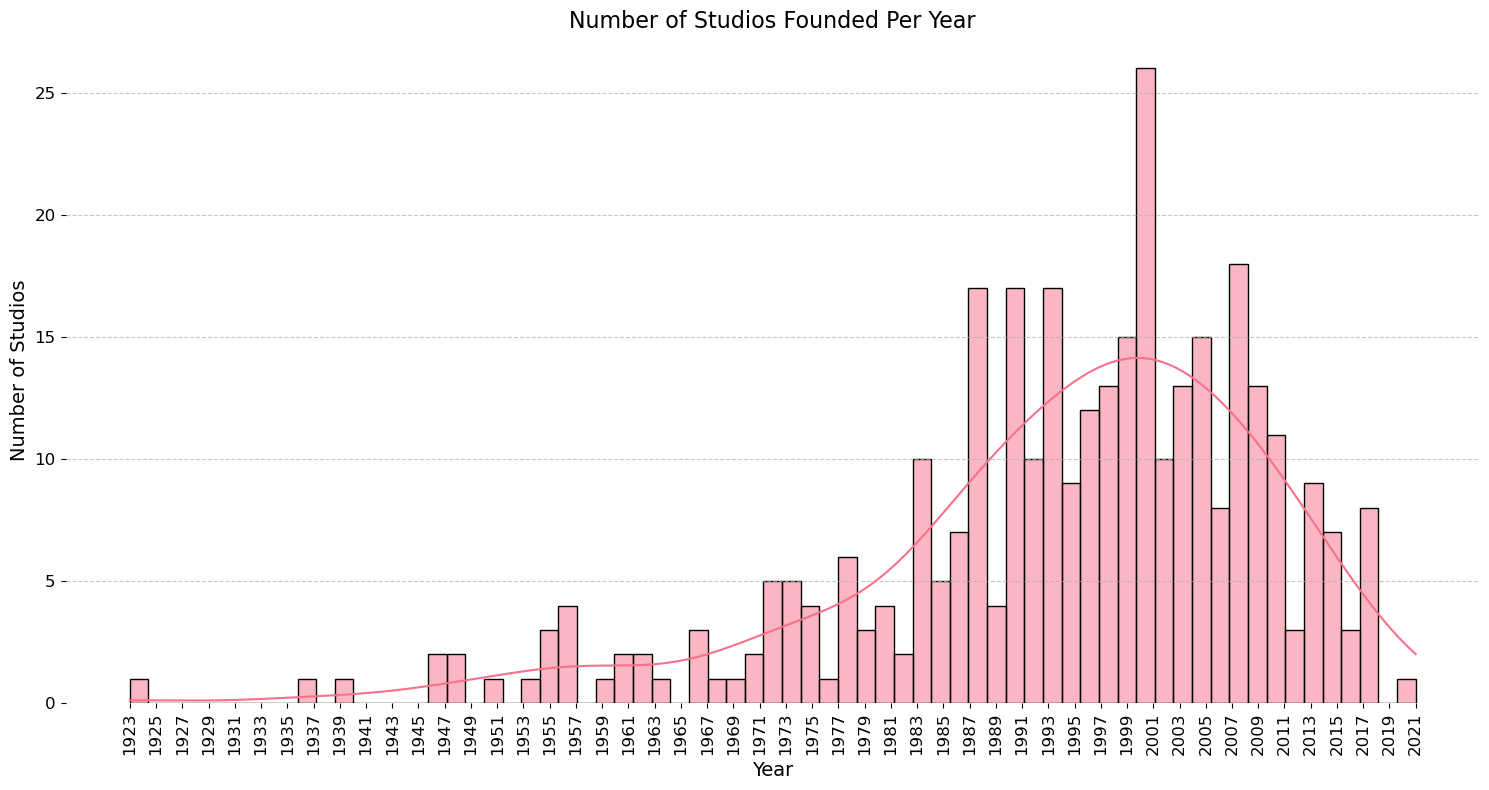

In [12]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Founded'].astype(int), bins=len(unq_founded), kde=True)
plt.title('Number of Studios Founded Per Year',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=14)
plt.xticks(ticks=np.arange(int(unq_founded.min()), int(unq_founded.max()) + 1, 2))
plt.ylabel('Number of Studios', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/studio_founded_distribution.png')
plt.show()